https://www.kaggle.com/sulianova/cardiovascular-disease-dataset
    
## 本次目標：預測心血管疾病是否存在

## 數據包含：

年齡|目標特徵|年齡| int（天）

高度|目標特徵|身高| int（cm）|

重量|目標特徵|重量|浮（kg）|

性別|目標特徵|性別|分類代碼|

收縮壓|| ap_hi | int |

舒張壓|| ap_lo | int |

膽固醇||膽固醇| 1：正常，2：高於正常，3：遠高於正常值|

葡萄糖|| gluc | 1：正常，2：高於正常，3：遠高於正常值|

吸煙|主觀特徵|煙|二進制|

酒精攝入量|主觀特徵|酒精|二進制|

身體活動|主觀特徵|活躍的|二進制|


## 目標欄位：

* 有無疾病(cardio)　有=1 無=0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("cardio_train.csv") #讀取CSV檔 
df.head()

id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0              0;18393;2;168;62.0;110;80;1;1;0;0;1;0                               
1              1;20228;1;156;85.0;140;90;3;1;0;0;1;1                               
2              2;18857;1;165;64.0;130;70;3;1;0;0;0;1                               
3             3;17623;2;169;82.0;150;100;1;1;0;0;1;1                               
4              4;17474;1;156;56.0;100;60;1;1;0;0;0;0

### 觀察到,此檔案是以 ; 做區隔 因此我們操作pandas,用於區隔資料

In [2]:
df = pd.read_csv("cardio_train.csv",sep=';') #讀取CSV檔 
df.head()


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

## 查看目標 : << cardio >> 中 正負資料的比例有多少
## 以圖表呈現

cardio欄位的資料型態為<class 'numpy.int64'>


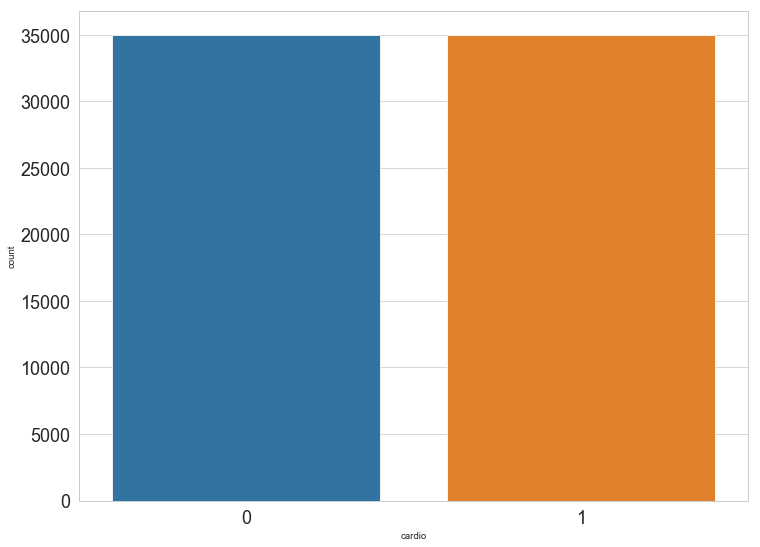

In [3]:
df['cardio'].value_counts

name = 'cardio'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

In [4]:
df.drop(['id'],axis=1,inplace=True)
df.isnull().sum(axis=0)

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 製作訓練與測試資料集


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [6]:
df2 = df.drop('cardio',axis=1)
X = preprocessing.scale(df2)
y = df['cardio']

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=2)
X_train.shape,X_test.shape

((49000, 11), (21000, 11))

## 羅吉斯回歸簡介：

### 線性回歸是用來預測一個連續的值，羅吉斯回歸是用來分類。

![title](1.png)

![title](2.png)

## 使用羅吉斯回歸來看準確率

In [8]:
# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(X_train, y_train)

# 預測測試集
y_pred = logreg.predict(X_test)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.7242857142857143


In [10]:
y_pred = logreg.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(y_pred, name = 'Predict'), margins = True)

Predict     0     1   All
Actual                   
0        1717  1520  3237
1        1756  1315  3071
All      3473  2835  6308

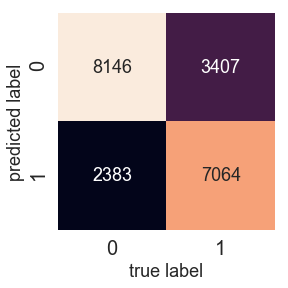

In [13]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');